In [1]:
from config import *
from pandas import read_csv
import plotnine as pn

In [2]:
true_results = read_csv(
    os.path.join(RESULTS_DIR, "sim_output.csv"),
    dtype={
        "age": "string"
    },
    parse_dates=[2],
    index_col=0
)
true_results.describe()

,sim,date,incidence,prevalence,num_tests,theta,obs_positives,obs_prevalence
count,88200.000000,88200,88200.000000,88200.000000,88200.000000,88200.00000,88200.000000,88200.000000
mean,49.500000,2020-11-12 00:00:00,0.001133,0.020075,2499.500000,0.00002,45.209331,0.020069
min,0.000000,2020-08-31 00:00:00,0.000031,0.000140,853.000000,0.00002,0.000000,0.000000
25%,24.750000,2020-10-06 00:00:00,0.000310,0.004020,1609.000000,0.00002,9.000000,0.003949
50%,49.500000,2020-11-12 00:00:00,0.000810,0.016192,1998.500000,0.00002,30.000000,0.015538
75%,74.250000,2020-12-19 00:00:00,0.001606,0.029343,3578.000000,0.00002,64.000000,0.029346
max,99.000000,2021-01-24 00:00:00,0.005528,0.093155,4960.000000,0.00002,283.000000,0.118406
std,28.866234,NaN,0.001107,0.019388,1367.772932,0.00000,48.495724,0.019702


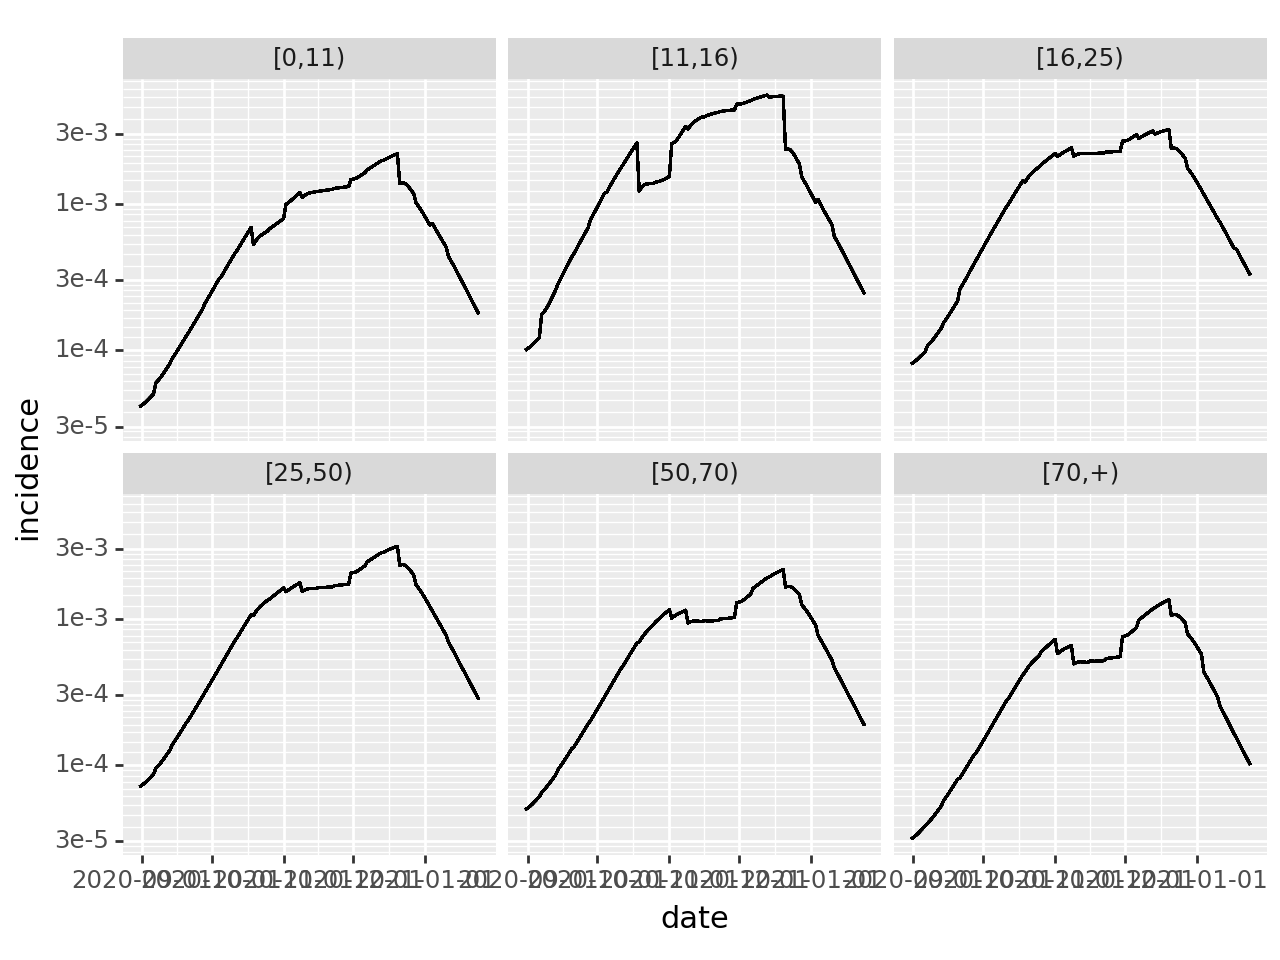

<Figure Size: (640 x 480)>

In [3]:
(
    pn.ggplot(true_results.reset_index(), pn.aes("date", "incidence", group="sim")) +
    pn.geom_line() +
    pn.scale_y_log10() +
    pn.facet_wrap("~age")
)

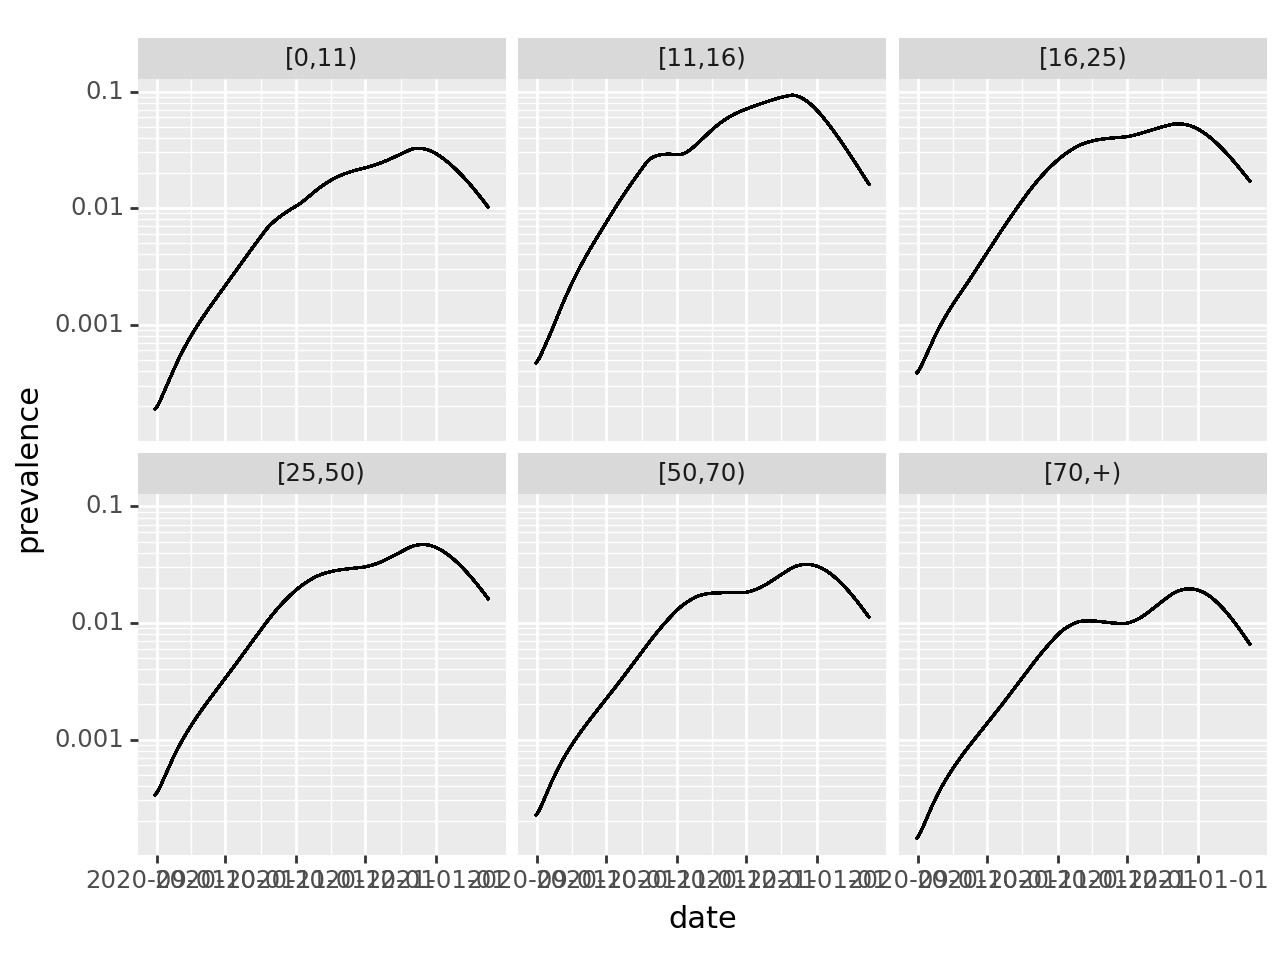

<Figure Size: (640 x 480)>

In [4]:
(
    pn.ggplot(true_results.reset_index(), pn.aes("date", "prevalence", group="sim")) +
    pn.geom_line() +
    pn.scale_y_log10() +
    pn.facet_wrap("~age")
)

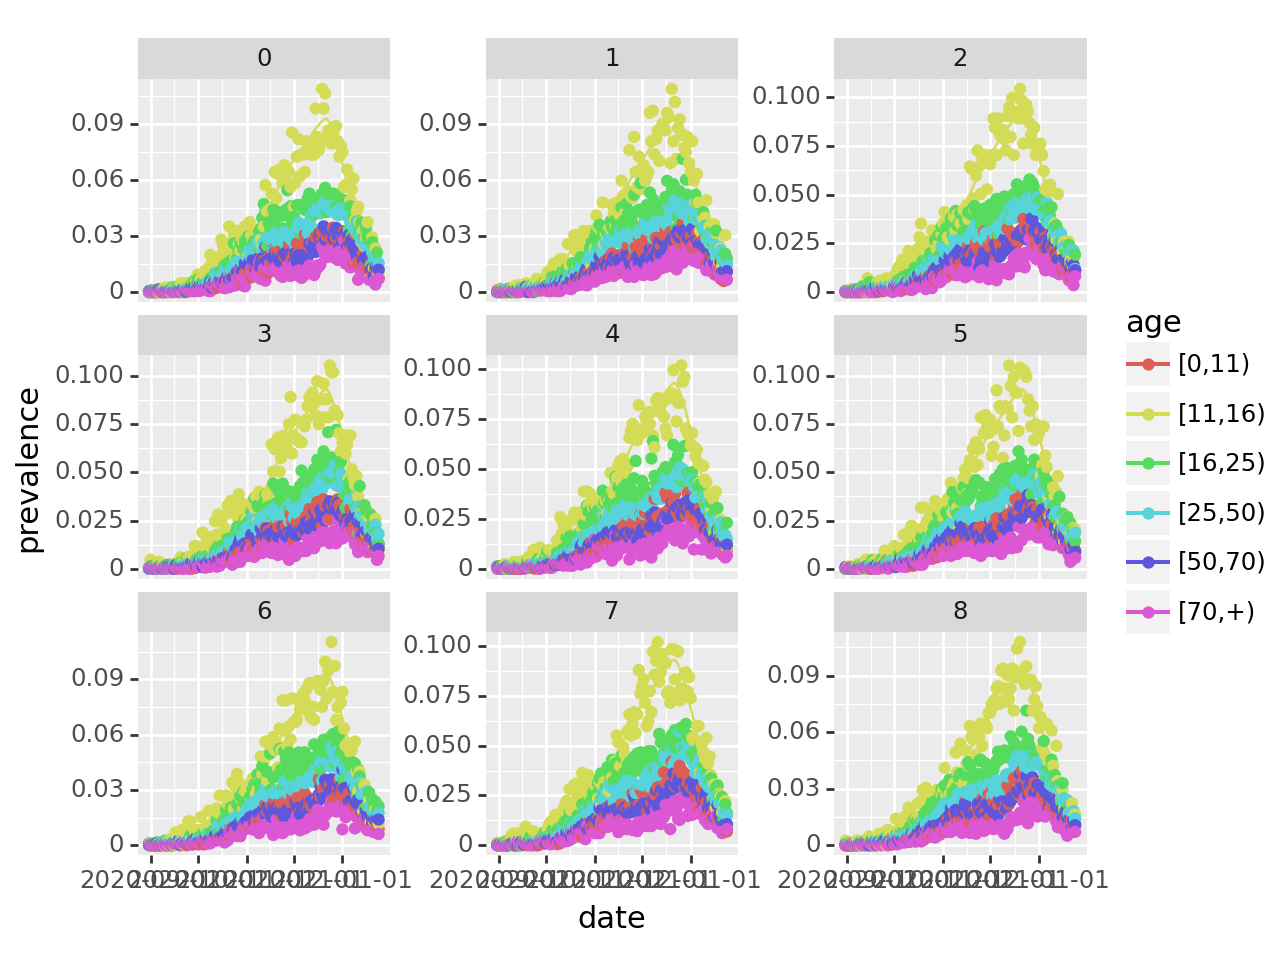

<Figure Size: (640 x 480)>

In [5]:
(
    pn.ggplot(true_results[true_results["sim"] < 9], pn.aes("date", "prevalence", colour = "age")) +
    pn.geom_line() +
    pn.geom_point(pn.aes(y="obs_prevalence")) +
    pn.facet_wrap("~sim",scales="free_y")
)

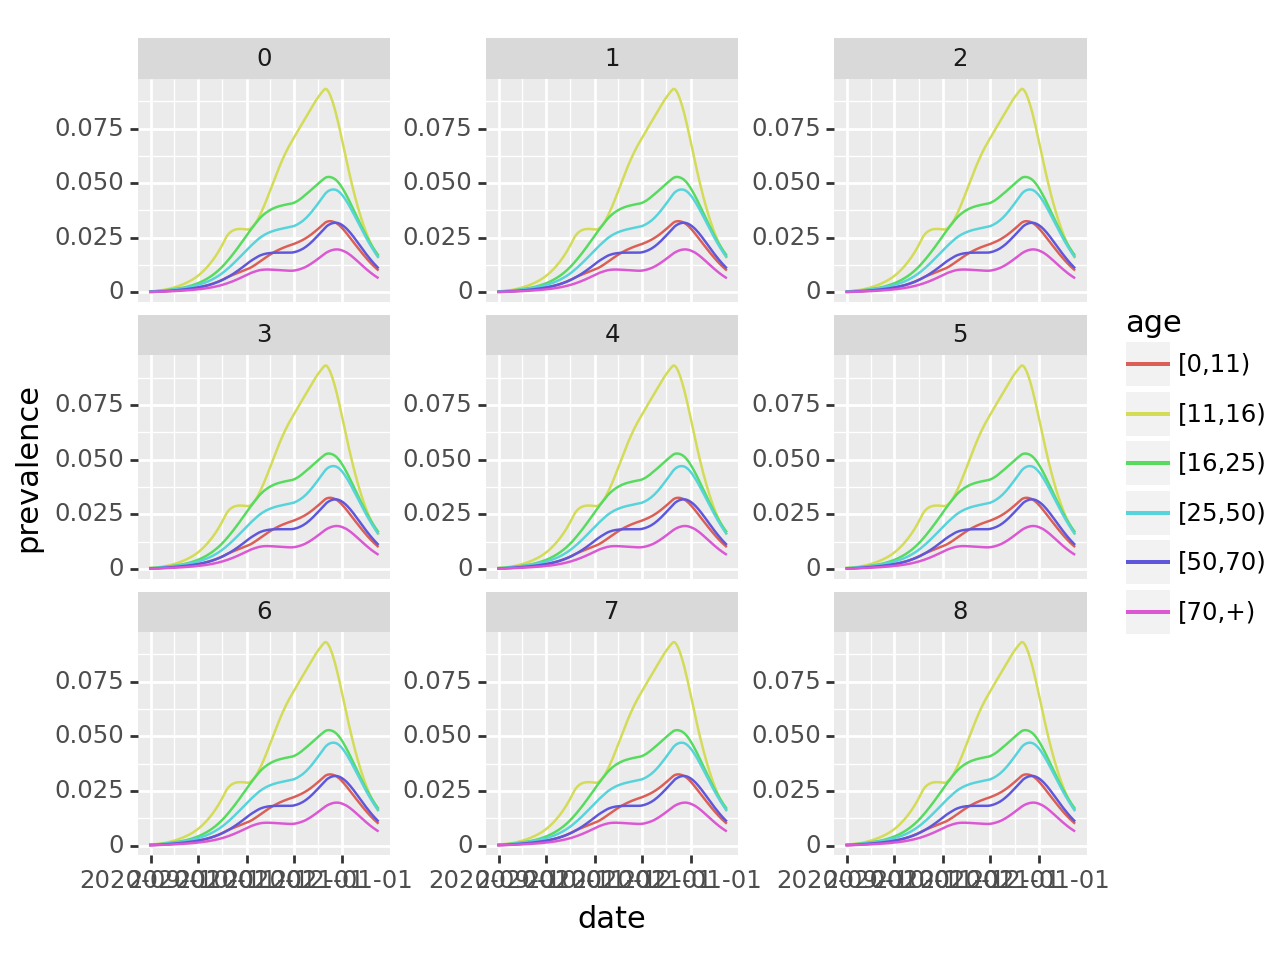

<Figure Size: (640 x 480)>

In [6]:
(
    pn.ggplot(true_results[true_results["sim"] < 9], pn.aes("date", "prevalence", colour = "age")) +
    pn.geom_line() +
    pn.facet_wrap("~sim",scales="free_y")
)